# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** The agent stays idle during the simulation. He receives small rewards for behaving correctly (not moving when traffic lights are red) and much larger penalties when not moving even though traffic and traffic lights support this behavior. The traffic light color affects both: Magnitude and reward or penalty.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

**Flags explained**
- *epsilon*: The exploration factor epsilon can be set between 0 and 1. It defines the probability with which a random action is taken by the primary agent rather than the learned optimal action in order to explore alternative solutions.
- *tolerance*: During implementation of the project a decay-function of the epsilon value will be implemented. The tolerance is the threshold value which indicates the end of the learning (trial) period and initiates the testing.
- *enforce_deadline*: Enforcing a deadline causes time-based penalties. 

**Environment class**
The function act() is called to define the consquences, rewards and penalties of the agent's action. 

**Simulator**
The render_text function returns the text-only console output while the render()-function uses pygame for visual representation of the game states.

**Planner**
East-West directions are considered first. 

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


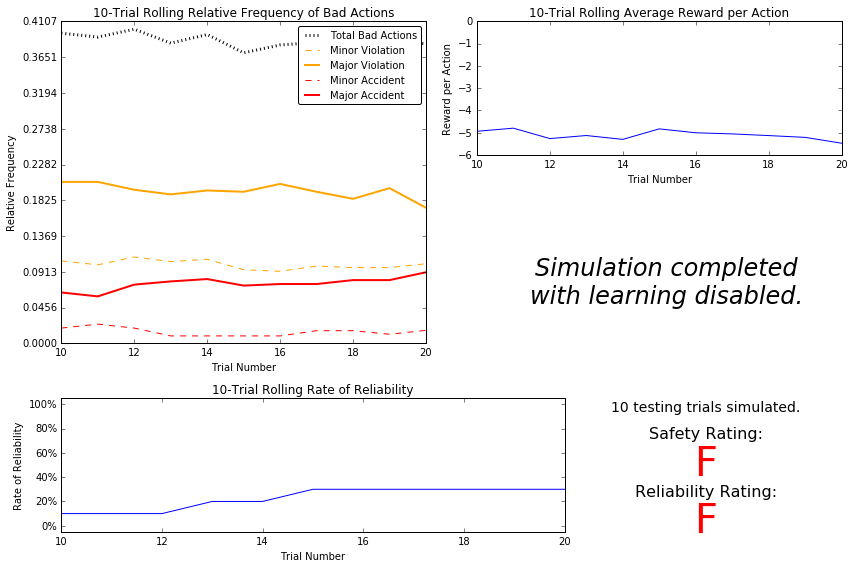

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

*How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*

Based on the bad actions chart the frequency of bad decision ranges between 36% and 42%. About 5% to 10% of those decisions cause accidents. 

*Given that the agent is driving randomly, does the rate of reliability make sense?*

The reliability rate chart indicates the mean success rate of the last 10 trials. It helps understanding if there is a base line of random success, however the overall mean would be more precise for this. The chart assumes a time-based consistent change (improvement) of reliability. Under that consideration it does not make sense if applied to random actions.

*What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*

The average reword per action is clearly negative somehwere between -5 and -6. We can assume that random behavior usually leads to penalties rather than rewards. This could be considered a heavy penalty. 

*As the number of trials increases, does the outcome of results change significantly?*

There is no correlation between time and result. Differences in the results are due to chance and therefore not significant (at least in a statistical sense). 

*Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

Neither safe nor reliable. Ratings for both factors are F. Reason is that the agent often fails to reach the destination in time as well as it produces many accidents along the way. 

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

There are only six features available: The next waypoint, the deadline and the sensor data providing left, right, oncoming and light. All sensor data is highly relevant because it enables the agent to act by the rules (safety) and avoid major accidents (efficiency and safety). 

Also relevant is the next waypoint. It helps the agent assess if following the hint will have a positive impact on the reward receiving. Basically, this feature tells the agent how to behave efficiently. Using the waypoint the agent just needs to learn to follow this waypoint instead of needing to learn directions and orientation on a map.

The deadline is only relevant, if we wanted to balance success with safety, ignoring traffic rules if that helps reaching the destination in time. This does not seem to be the case here. The deadline does also not necessarily contribute to the agents efficiency. Because the waypoint is the only means of orientation for the agent, it is not able to choose routes of different lengths. Even if the deadline would provide useful information it would increase the state space significantly (it has as many states as time steps until the deadline is reached). Therefore it might not be favorable to include deadline in either scenario.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

Beginning with the sensor data there are 3 parameters (left, right, onward) which all can have 4 values (left, right, forward, None). The traffic light has two states (green, red). The next waypoint can be left, right or forward (None value is irrelevant because it indicates the destination state). The state space contains then:

4 x 4 x 4 x 2 x 3 = 384 combinations

This is a very large number of values. However, not all state-combinations are relevant, so this can be reduced (according to environment.py). To reduce the state space we need to make 2 assumptions:

1. All other traffic agents are behaving according to the rules
2. Our own agent is (or should be) behaving according to the rules so that we can reduce the cases to the scenarios under these conditions.

Since it is not allowed to engineer new features this leaves us with the single option to remove the information about the right-hand traffic which does not play a role in any legal traffic maneauver. This reduces the state space to the following:

left-hand traffic: 3 states
onward traffic: 3 states
traffic lights: 2 states
waypoint: 3 states

3 x 3 x 2 x 3 = 54 states

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

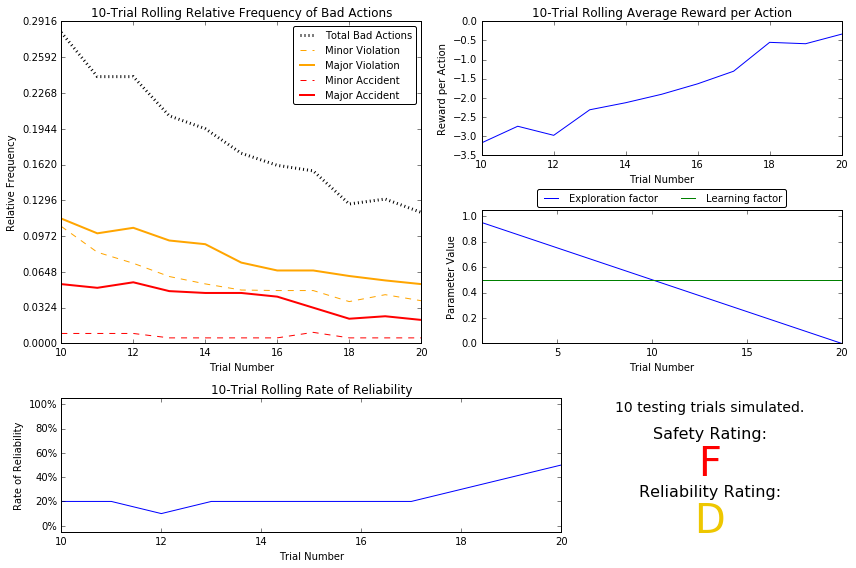

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*

The fact that the overall rating (safety F and reliability D) is still very bad is similar ot the initial agent. Opposed to the first chart there is now a clear correlation between trials/training time and the reduction of error in the overall performance. 

- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*

The epsilon value decayed from 1 to 0.05 given the linear decay function epsilon - 0.05. This is the case at the 20th trial, as it shows in the exploration factor chart on the bottom right. It is in line with the epsilon tolerance defined. 

- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*

A linear decay function was used, matching the graph, reducing the exploration in 5% steps from 100 to 0.

- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*

Both did, as expected for a learning agent. From the tendency of the charts one can assume that there is still a lot room for improvement by running longer learning periods.

- *How does the safety and reliability rating compare to the initial driving agent?*

The reliability improved a little (from F to D), the safety rating did not reach a better grade yet. This does not mean the agent was not improving on safety. Going by the number of violations and accidents the learning agent is already a lot better than the previous one, not enough though to get a better grade. 

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

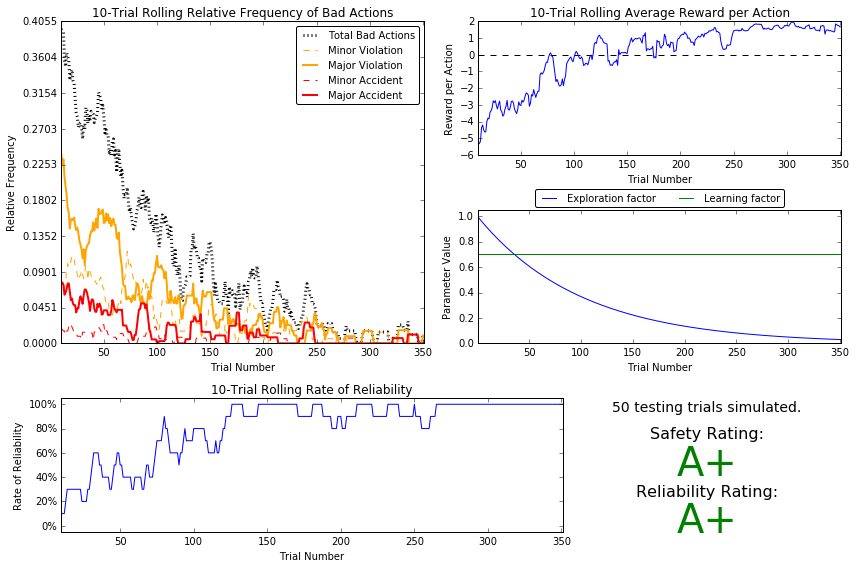

In [13]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

*What decaying function was used for epsilon (the exploration factor)?*

I used the e-function for decay, with an a-factor of 0.01 for epsilon.

*Approximately how many training trials were needed for your agent before begining testing?*

After approx. 200 trials the function decayed so that the testing could be started. 

*What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*

Alpha: 0.7

Epsilon tolerance: 0.03

Alpha: After testing different values an alpha value of .7 seems to lead to the optimal result, emphasizing quick learning over slow adoption. 

Epsilon tolerance: With the set parameters the agent needs up to 350 trials to figure out the optimal policy. The tolerance needs to be set low enough that the agent actually proceeds learning until this state but high enough that the learning does not go on for unnecessary long time in addition. 

*How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*

Both ratings (safety and reliability) improved to the best-possible rating A+. While all parameters do have a certain impact on this improvement the major factor seems to be the fact that the training period is a lot longer than before. 

*Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*

Based on ratings and results that is the case.

*Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

Both ratings are A+ and at the end of the training phase both, accidents and violations, are very close to 0. This result is satisfying, further improvement could be made in the reduction of training time when further optimizing the parameters.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

1. Optial policy

The optimal policy requires the agent to make no mistakes while reaching the destination as good as possible. That means:

- the agent never crosses red lights
- the agent checks for traffic when relevant (does not turn left in oncoming traffic is in the way, does not turn right if there is forward moving traffic from the left)

Under the above constraints the agent should move to the destination as fast as possible, which means either following the waypoint it is given or (if traffic would require the agent to wait) moving towards the destination horizontally (east-west) if that is possible.

2. Investigating the agent policy

Not part of this consideration was the requirement that the agent would consider N-S and E-W directions at the same time. This is not possible because the environment does not provide this kind of information. 

The agent is able to behave optimal in many situations. The most complex one (the left turn, considering oncoming traffic moving forward or right) is difficult though. Errors occur mainly in this area. 
 
3. Examples for optimal policy
 
As stated above the agent only behaves not entirely optimal. Here are examples for optimal behavior:

Structure of state-data: (traffic light state, input left, input oncoming, waypoint)

('red', None, 'right', 'forward')
 -- forward : -6.48
 -- left : -40.56
 -- right : 0.60
 -- None : 1.25

The agent correctly stopped at the red light.

('green', None, 'forward', 'forward')
 -- forward : 2.62
 -- left : 0.39
 -- right : 0.04
 -- None : -5.62

The agent correctly followed the waypoint when traffic light was green.

('green', 'forward', 'left', 'left')
 -- forward : 0.02
 -- left : 2.36
 -- right : 0.16
 -- None : -4.09

The agent turned left as the waypoint indicated while traffic was allowing this maneuver. 

4. Examples for suboptimal policy

('green', None, 'right', 'left')
 -- forward : 0.09
 -- left : 1.93
 -- right : 0.70
 -- None : -3.87
 
 The agent turns left even though there is oncoming traffic moving right. Due to the right of way, the agent should rather move forward or right to avoid collisions.

('red', 'right', 'left', 'right')
 -- forward : 0.00
 -- left : -9.66
 -- right : 0.00
 -- None : 0.93

Here, the agent deciees to stop at a red light. It would be more efficient to turn right, because the red light does not need to be considered and the left-hand traffic does not conflict with this behavior. 

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

Considering future rewards would reward the agent for being in a certain state, backpropagating this reward in order to consider it for the action at hand. Since the state does not contain any global information (like the position on a map) there is no inherent value in being in a state, so considering the future states without any global information in it does not help the agent being more safe or efficient.

Even if the agent would have global information available the randomness of the scenario prevents the agent from deducting global state value. In general the proximity to the destination state would have a higher reward/value than a state farther away. When repeating the trials the agent could learn a pattern of the subsequent states, building a path towards a goal only if the destination is a static location in the world that can be relatively considered by some global information in the states.

Hence, future rewards would be useful in a scenario where the current location (coordinates) and a static destination are available. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.